# **2018 Central Park Squirrel Census EDA**



In [1]:
import requests
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

# **Part 1 - Get the *2018 Squirrel Census* data using the NYC Open Data api**



In [2]:
#Use NYC Open Data api to get 2018 Squirrel Census data
url = 'https://data.cityofnewyork.us/resource/vfnx-vebw.json'

response = requests.get(url)

In [3]:
#get the json encoded copy of the response
#json is stored in Python as a list of dictionaries
response_json = response.json()

In [4]:
#create a DataFrame from the json
df = pd.DataFrame(response_json)

In [5]:
df.head()

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,combination_of_primary_and,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,primary_fur_color,location,above_ground_sighter,age,color_notes,highlight_fur_color,specific_location,other_activities,other_interactions,:@computed_region_efsh_h5xi
0,-73.9561344937861,40.7940823884086,37F-PM-1014-03,37F,PM,10142018,3,+,False,False,False,False,False,False,False,False,False,False,False,False,False,"{'type': 'Point', 'coordinates': [-73.95613449...",19,4,19,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-73.9688574691102,40.7837825208444,21B-AM-1019-04,21B,AM,10192018,4,+,False,False,False,False,False,False,False,False,False,False,False,False,False,"{'type': 'Point', 'coordinates': [-73.96885746...",19,4,19,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-73.9742811484852,40.775533619083,11B-PM-1014-08,11B,PM,10142018,8,Gray+,False,True,False,False,False,False,False,False,False,False,False,False,False,"{'type': 'Point', 'coordinates': [-73.97428114...",19,4,19,13,Gray,Above Ground,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-73.9596413903948,40.7903128889029,32E-PM-1017-14,32E,PM,10172018,14,Gray+,False,False,False,True,True,False,False,False,False,False,False,False,True,"{'type': 'Point', 'coordinates': [-73.95964139...",19,4,19,13,Gray,NaN,NaN,Adult,Nothing selected as Primary. Gray selected as ...,NaN,NaN,NaN,NaN,NaN
4,-73.9702676472613,40.7762126854894,13E-AM-1017-05,13E,AM,10172018,5,Gray+Cinnamon,False,False,False,False,True,False,False,False,False,False,False,False,False,"{'type': 'Point', 'coordinates': [-73.97026764...",19,4,19,13,Gray,Above Ground,NaN,Adult,NaN,Cinnamon,on tree stump,NaN,NaN,NaN


# **Part 2 - Data Exploration**

In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   x                            1000 non-null   object
 1   y                            1000 non-null   object
 2   unique_squirrel_id           1000 non-null   object
 3   hectare                      1000 non-null   object
 4   shift                        1000 non-null   object
 5   date                         1000 non-null   object
 6   hectare_squirrel_number      1000 non-null   object
 7   combination_of_primary_and   1000 non-null   object
 8   running                      1000 non-null   bool  
 9   chasing                      1000 non-null   bool  
 10  climbing                     1000 non-null   bool  
 11  eating                       1000 non-null   bool  
 12  foraging                     1000 non-null   bool  
 13  kuks                         1000 

In [7]:
#Long and Lat are strings.
#Convert them to numeric values
df['x']=pd.to_numeric(df['x'])
df['y']=pd.to_numeric(df['y'])

In [8]:
#The dates are strings.
#Convert them to datetime.
df['date'] = pd.to_datetime(df['date'], format='%m%d%Y')


In [9]:
#The only numeric columns are Long and Lat., which were just converted above
df.describe()

,x,y
count,1000.000000,1000.000000
mean,-73.967020,40.781087
std,0.007698,0.010139
min,-73.980961,40.765008
25%,-73.972957,40.772389
50%,-73.968374,40.778225
75%,-73.959765,40.791285
max,-73.949722,40.800046


In [10]:
#Check for null values
df.isna().sum()

x                                0
y                                0
unique_squirrel_id               0
hectare                          0
shift                            0
date                             0
hectare_squirrel_number          0
combination_of_primary_and       0
running                          0
chasing                          0
climbing                         0
eating                           0
foraging                         0
kuks                             0
quaas                            0
moans                            0
tail_flags                       0
tail_twitches                    0
approaches                       0
indifferent                      0
runs_from                        0
geocoded_column                  0
:@computed_region_f5dn_yrer      0
:@computed_region_yeji_bk3q      0
:@computed_region_92fq_4b7q      0
:@computed_region_sbqj_enih      0
primary_fur_color               15
location                        20
above_ground_sighter

## How many squirrels were observed on each day of the survey?

In [11]:
#How many squirrels were observed on each day of the survey?
df.groupby('date')['unique_squirrel_id'].count()

date
2018-10-06    120
2018-10-07    136
2018-10-08    100
2018-10-10    110
2018-10-12     60
2018-10-13    135
2018-10-14    124
2018-10-17     84
2018-10-18     68
2018-10-19     44
2018-10-20     19
Name: unique_squirrel_id, dtype: int64

## What were the ages of the squirrels?

In [12]:
#What were the ages of the squirrels?
df['age'].value_counts()

Adult       840
Juvenile    106
Name: age, dtype: int64

## Find the ID for the juvenile squirrels that were observed eating.

In [13]:
#Filtering is the same as the query:
#df[(df['age']=='Juvenile') & (df['eating'])]
#is the same as
#df.query('age=="Juvenile" & eating')
df.query('age=="Juvenile" & eating')[['unique_squirrel_id']]

,unique_squirrel_id
17,32A-PM-1013-03
47,19D-AM-1007-01
52,14F-AM-1007-05
111,36I-PM-1007-10
183,19B-AM-1019-02
200,22C-AM-1013-03
217,8A-AM-1013-03
252,10A-AM-1006-03
297,35D-PM-1013-03
307,19B-PM-1018-05


## What entries are in the other_activities column?

In [14]:
df['other_activities'].unique()

array([nan, 'grooming', 'walking', 'moving slowly', 'sitting',
       'eating (ate upside down on a tree — #jealous)',
       'wrestling with mother', 'running (with nut)', 'playing with #5',
       'hiding nut', 'drank from a pond of rain water',
       'chasing (#4 across trees)', 'gathering acorns',
       'eating (a mushroom),circles around us,really fat,scratching himself,grooming activity',
       'digging', 'walking on branch',
       'being chased,was pushed by other squirrel', 'climbing (tree)',
       'chasing #8', 'still', 'stop to look at me—then ran',
       'chasing (a chipmunk)', 'took nut to bury', 'flying',
       'stole (found?) an entire sandwich',
       'walking w/ something in mouth', 'burying nut', 'begging',
       'was hanging out w/ #2 until i showed up', 'quietly',
       'nest building', 'burying', 'dead (something ran over it)',
       'chased #12', 'playing (with #9)', 'sitting still', 'posing',
       'sitting in tree', 'together w/ #7', 'not sure walk-pa

In [15]:
df['other_activities'].value_counts()

walking                                                         7
burying                                                         6
digging                                                         6
sitting                                                         5
jumping                                                         4
                                                               ..
together w/ #7                                                  1
sitting in tree                                                 1
posing                                                          1
sitting still                                                   1
stood still & watched me then jumped on a fence and ran away    1
Name: other_activities, Length: 119, dtype: int64

## What entries are in the other_interactions column?

In [16]:
df['other_interactions'].unique()

array([nan, "fenced off area can't approach", 'gnd to tree',
       'ran from dog-walker', 'me', 'dog chased', 'avoided people',
       'curious but shy', 'studying us looking for food', 'watching me',
       'looked at us', 'unaware of', 'looking/begging for food',
       'child chasing', 'indifferent then runs from', 'mad!', 'stared',
       'watching', 'eventually ran from lawnmower (tail flag)',
       'approaches (food stand)', 'dog', 'runs from (me)',
       'approaches (primarily),runs from (initially),follows',
       "doesn't see me", 'came over on tree to see me then disappeared',
       'see stories and locations',
       'approaches (slightly),wary of humans',
       'approaches (he saw me,came towards,then darted up)',
       'ran away when a human approached with a dog',
       'too busy eating in his tree', 'indifferent (moving very fast)',
       'ran up tree when approached', 'runs from (us)',
       'first approaches then runs from - he was less than 1 yd. away from m

## Check out the primary fur colors.

In [17]:
df['primary_fur_color'].unique()

array([nan, 'Gray', 'Cinnamon', 'Black'], dtype=object)

In [18]:
df['primary_fur_color'].value_counts()

Gray        825
Cinnamon    126
Black        34
Name: primary_fur_color, dtype: int64

# **Part 3 - Exploratory Charts and Plots**

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


## 3A) Fur Color


---



## Get a sense of the primary fur colors.








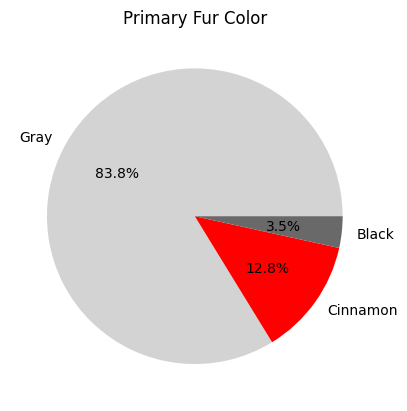

In [20]:
#A quick pie chart using the Pandas built-in plot()
#(pie charts are not available directly in Seaborn)
df['primary_fur_color'].value_counts().plot(kind='pie', colors=['lightgrey','red','dimgrey'], autopct='%1.1f%%', title='Primary Fur Color').set_ylabel(None)
plt.show()

## Determine the age groups among the fur colors

In [21]:
color_age = df.groupby(['primary_fur_color', 'age'])['unique_squirrel_id'].count()
color_age

primary_fur_color  age     
Black              Adult        27
                   Juvenile      4
Cinnamon           Adult       106
                   Juvenile     16
Gray               Adult       701
                   Juvenile     85
Name: unique_squirrel_id, dtype: int64

In [22]:
color_age = color_age.to_frame().reset_index()
color_age

,primary_fur_color,age,unique_squirrel_id
0,Black,Adult,27
1,Black,Juvenile,4
2,Cinnamon,Adult,106
3,Cinnamon,Juvenile,16
4,Gray,Adult,701
5,Gray,Juvenile,85


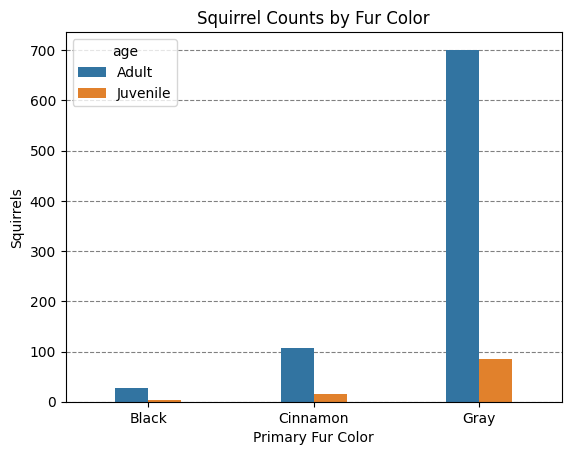

In [23]:
fig, ax = plt.subplots()

sns.barplot(ax=ax, data=color_age, x='primary_fur_color', y='unique_squirrel_id', hue='age', width=.4)

ax.set_title('Squirrel Counts by Fur Color')
ax.set_ylabel('Squirrels')
ax.set_xlabel('Primary Fur Color')
#ax.grid()
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)
fig.show()

## 3B) Map the Squirrel Locations


---








## Distribution by latitude

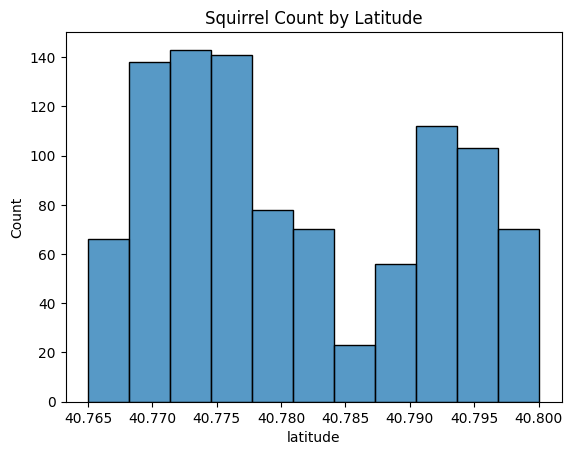

In [24]:
#Since latitude is continuous, a histogram can be used

#Distribution by latitude
fig, ax = plt.subplots()

sns.histplot(ax=ax, data=df['y'])
ax.set_xlabel('latitude')
ax.set_title('Squirrel Count by Latitude')
fig.show()

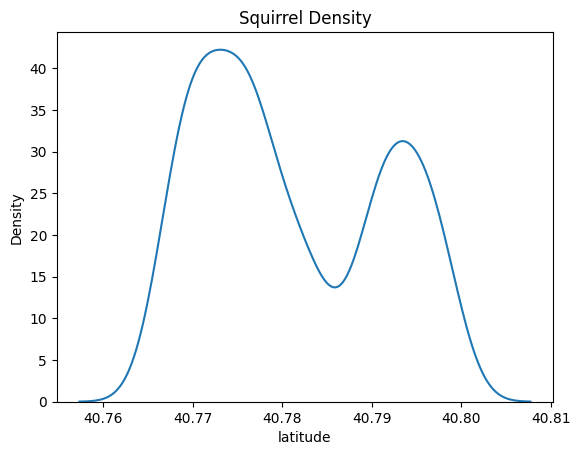

In [25]:
#Area under the curve of the KDE plot is the probability of seeing a squirrel in that latitude range
fig, ax = plt.subplots()

sns.kdeplot(ax=ax, data=df['y'])
ax.set_title('Squirrel Density')
ax.set_xlabel('latitude')
fig.show()

## Mapping by Longitude and Latitude

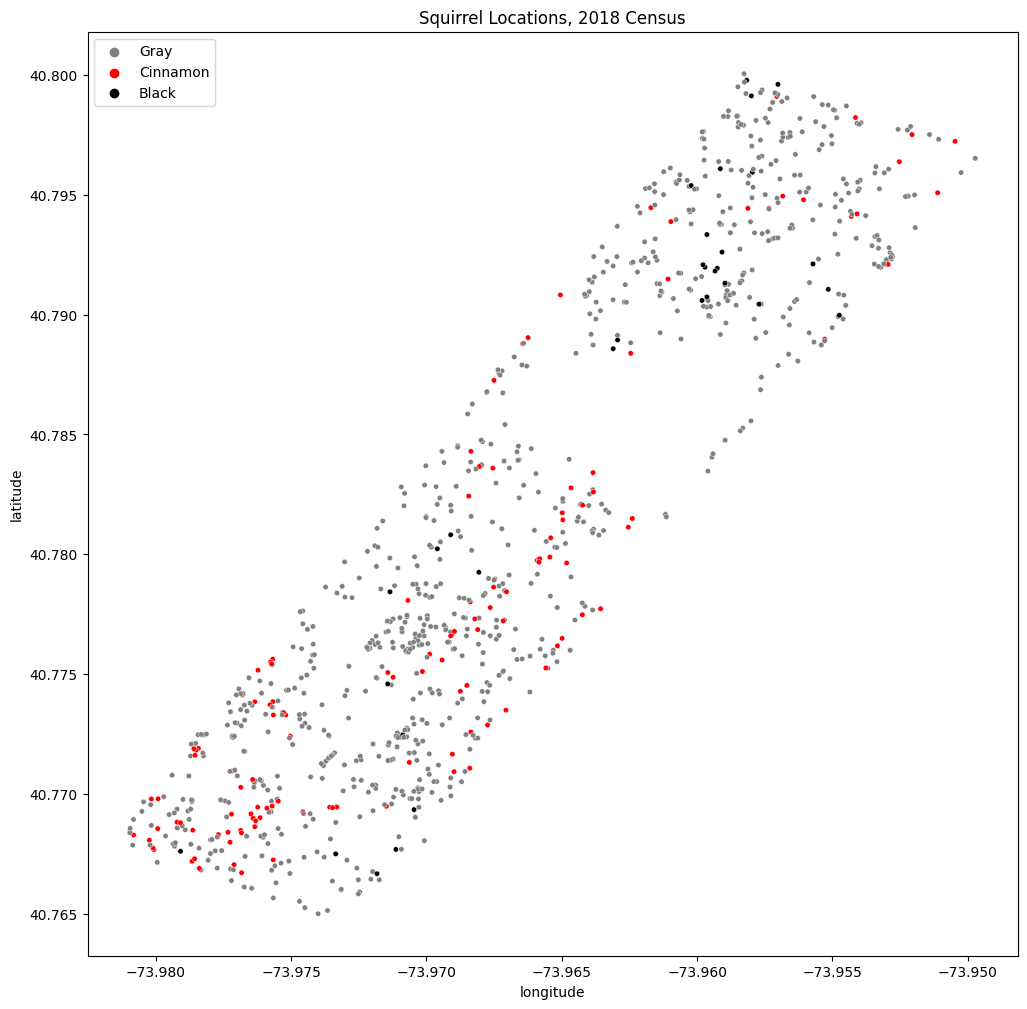

In [26]:
#Mapping the locations using a simple scatterplot of latitude and longitude
palette ={"Gray": "grey", "Cinnamon": "red", "Black": "k",}

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.scatterplot(ax=ax, data=df, x = 'x', y='y', hue='primary_fur_color', palette=palette, s=15)
ax.legend(loc='upper left')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('Squirrel Locations, 2018 Census')
#ax.set(xticklabels=[])
#ax.set(yticklabels=[])
fig.show()

## Mapping by Hectare

from the data set documentation:

**Hectare**

ID tag, which is derived from the hectare grid used to divide and count the park area. One axis that runs predominantly north-to-south is numerical (1-42), and the axis that runs predominantly east-to-west is alphabetical (A-I).


In [27]:
#The hectare is stored as an object in format "num-num-alpha".
#Create two new columns to store the x and y components of the hectare.

#get the num-num component
df['hectare_vert'] = pd.to_numeric(df['hectare'].str[0:2])

#get the alpha component
df['hectare_horz'] = df['hectare'].str[-1]

In [28]:
df['hectare_horz']

0      F
1      B
2      B
3      E
4      E
      ..
995    D
996    B
997    D
998    A
999    A
Name: hectare_horz, Length: 1000, dtype: object

In [29]:
df['hectare_vert'].describe()

count    1000.000000
mean       19.526000
std        12.773115
min         1.000000
25%         8.750000
50%        16.000000
75%        32.000000
max        42.000000
Name: hectare_vert, dtype: float64

In [30]:
#Create a column identifying northern squirrels.
df['northern_squirrel'] = df['hectare_vert'] >= 21

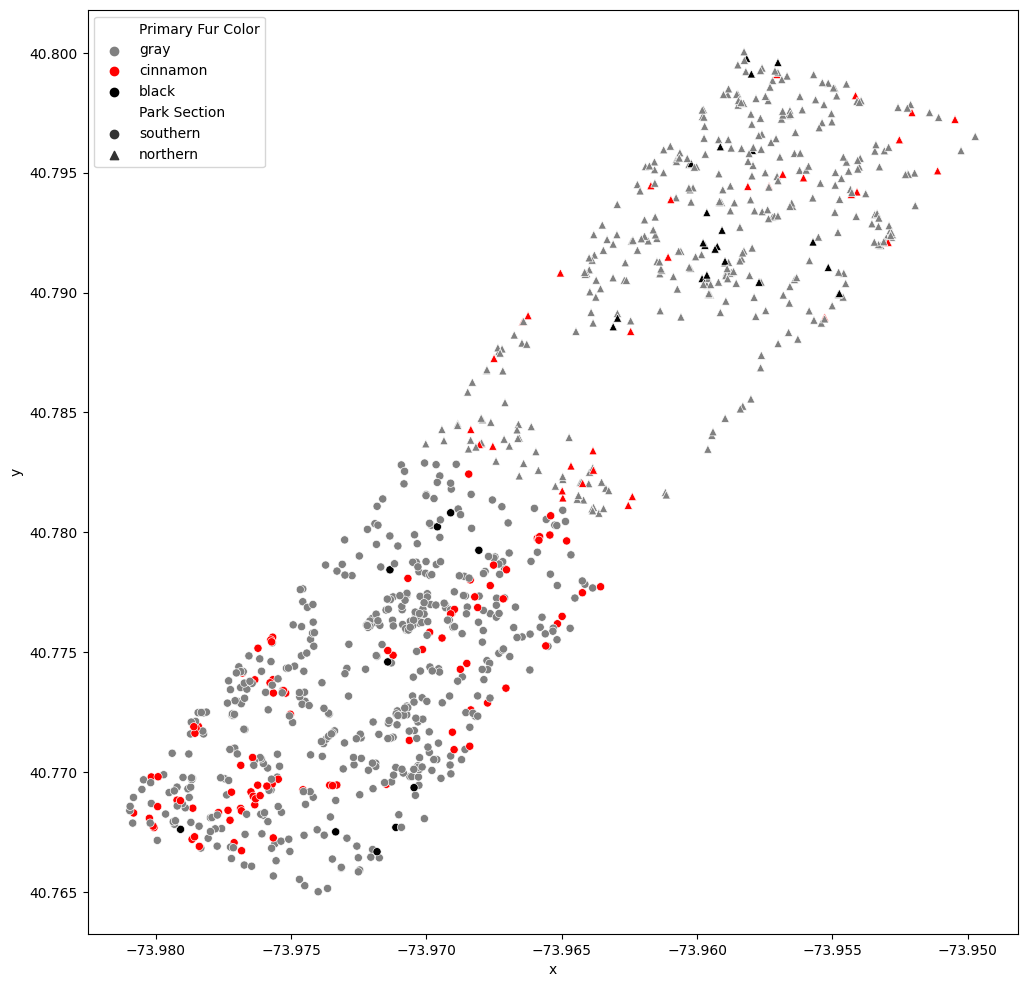

In [31]:
#Mapping using the scatterplot as above,
#but use style='northern_squirrel', markers=['o','^']
#to show different markers based on north/south
palette ={"Gray": "grey", "Cinnamon": "red", "Black": "k",}

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.scatterplot(ax=ax, data=df, x = 'x', y='y', hue='primary_fur_color', palette=palette, style='northern_squirrel', markers=['o','^'], s=[35] )

ax.legend(loc='upper left')

leg=ax.get_legend()
for t, l in zip(leg.get_texts(), ['Primary Fur Color','gray','cinnamon','black', 'Park Section','southern','northern']):
  t.set_text(l)

fig.show()

In [32]:
#Squirrels per hectare can be determined by grouping.
#Note that the index is a combination of hectare AND horz AND vert
hec_count = df.groupby(['hectare','hectare_horz','hectare_vert'])['unique_squirrel_id'].count().to_frame()
hec_count

,,,unique_squirrel_id
hectare,hectare_horz,hectare_vert,
01A,A,1,1
01B,B,1,5
01C,C,1,3
01D,D,1,5
01E,E,1,1
...,...,...,...
42E,E,42,1
42F,F,42,1
42G,G,42,4


In [33]:
#Simplify the Dataframe
hec_count = hec_count.reset_index().drop(columns='hectare')
hec_count

,hectare_horz,hectare_vert,unique_squirrel_id
0,A,1,1
1,B,1,5
2,C,1,3
3,D,1,5
4,E,1,1
...,...,...,...
301,E,42,1
302,F,42,1
303,G,42,4
304,H,42,2


In [34]:
#To use a heat map visualization, the data needs to be in a grid-like format.
#Use a pivot to transform the dataframe into a grid with a north/south orientation. (the position of the arguments passed to pivot() determines column, index, data):
#Make the 'hectare_vert' data into the index.
#Make the 'hectare_horz' data into the columns.
#Make the 'unique_squirrel_id' data into the data.
hec_count_pivot = hec_count.pivot('hectare_vert','hectare_horz', 'unique_squirrel_id').sort_index(ascending=False)
#Note: this could also be done in reverse, followed by a matrix transpose .T to accomplish the same end result
#hec_count_pivot = hec_count.pivot('hectare_horz','hectare_vert', 'unique_squirrel_id').T.sort_index(ascending=False)

hec_count_pivot

<ipython-input-34-714b6160809f>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hec_count_pivot = hec_count.pivot('hectare_vert','hectare_horz', 'unique_squirrel_id').sort_index(ascending=False)


hectare_horz,A,B,C,D,E,F,G,H,I
hectare_vert,,,,,,,,,
42,1.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,1.0
41,4.0,7.0,2.0,5.0,4.0,NaN,NaN,NaN,1.0
40,3.0,4.0,6.0,3.0,4.0,NaN,4.0,NaN,1.0
39,2.0,5.0,4.0,1.0,NaN,2.0,5.0,4.0,NaN
38,2.0,3.0,5.0,4.0,5.0,2.0,3.0,NaN,1.0
37,1.0,4.0,2.0,4.0,5.0,3.0,6.0,4.0,1.0
36,5.0,5.0,2.0,3.0,1.0,3.0,1.0,3.0,14.0
35,7.0,1.0,5.0,6.0,6.0,1.0,2.0,NaN,NaN
34,1.0,1.0,NaN,2.0,1.0,1.0,NaN,2.0,3.0


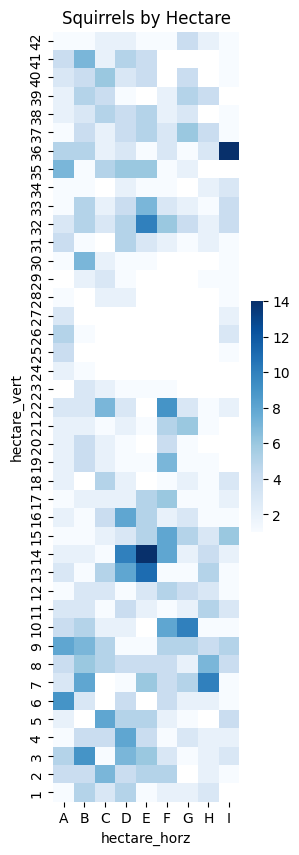

In [35]:
#A heat map visualization of the hectare count data
fig, ax = plt.subplots()
fig.set_size_inches(3,10)

sns.heatmap(ax=ax, data=hec_count_pivot, cmap='Blues', cbar_kws={'shrink': 0.3})
ax.set_title('Squirrels by Hectare')
fig.show()

## 3C) Squirrel Behavior


---



## Initial behavior analysis

In [36]:
#These are the boolean columns in the dataset that track common behaviors

#activities = df[['running','chasing', 'climbing', 'eating', 'foraging', 'kuks', 'quaas', 'moans', 'tail_flags', 'tail_twitches']].sum()

#Opt to include or not: 'approaches','indifferent', 'runs_from'.
#behavior_cols = ['running','chasing', 'climbing', 'eating', 'foraging', 'kuks', 'quaas', 'moans', 'tail_flags', 'tail_twitches', 'approaches','indifferent', 'runs_from']
behavior_cols = ['running','chasing', 'climbing', 'eating', 'foraging', 'kuks', 'quaas', 'moans', 'tail_flags', 'tail_twitches']

behaviors = df[behavior_cols].sum()
behaviors=behaviors.sort_values(ascending=False)
behaviors

foraging         474
eating           255
running          227
climbing         205
tail_twitches    137
chasing           88
tail_flags        53
kuks              32
quaas             17
moans              1
dtype: int64

In [37]:
#To do a quick chart of the behaviors, the aggregation object (Panda series) must be made into a dataframe,
#then transposed into wide format
behaviors = behaviors.to_frame().T
behaviors

,foraging,eating,running,climbing,tail_twitches,chasing,tail_flags,kuks,quaas,moans
0,474,255,227,205,137,88,53,32,17,1


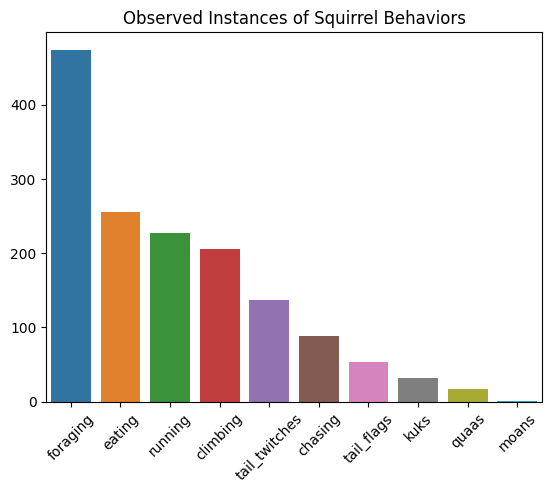

In [38]:
fig, ax = plt.subplots()
fig
sns.barplot(ax=ax, data=behaviors)
ax.set_xticklabels(labels=behaviors.columns, rotation=45)
ax.set_title('Observed Instances of Squirrel Behaviors')
fig.show()


In [39]:
#a review of the dataframe
df.head()

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,combination_of_primary_and,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,primary_fur_color,location,above_ground_sighter,age,color_notes,highlight_fur_color,specific_location,other_activities,other_interactions,:@computed_region_efsh_h5xi,hectare_vert,hectare_horz,northern_squirrel
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,+,False,False,False,False,False,False,False,False,False,False,False,False,False,"{'type': 'Point', 'coordinates': [-73.95613449...",19,4,19,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,F,True
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,+,False,False,False,False,False,False,False,False,False,False,False,False,False,"{'type': 'Point', 'coordinates': [-73.96885746...",19,4,19,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,B,True
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,Gray+,False,True,False,False,False,False,False,False,False,False,False,False,False,"{'type': 'Point', 'coordinates': [-73.97428114...",19,4,19,13,Gray,Above Ground,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,B,False
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Gray+,False,False,False,True,True,False,False,False,False,False,False,False,True,"{'type': 'Point', 'coordinates': [-73.95964139...",19,4,19,13,Gray,NaN,NaN,Adult,Nothing selected as Primary. Gray selected as ...,NaN,NaN,NaN,NaN,NaN,32,E,True
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Gray+Cinnamon,False,False,False,False,True,False,False,False,False,False,False,False,False,"{'type': 'Point', 'coordinates': [-73.97026764...",19,4,19,13,Gray,Above Ground,NaN,Adult,NaN,Cinnamon,on tree stump,NaN,NaN,NaN,13,E,False


In [40]:
#A first attempt evalute behaviors using transverse sections based on hectares.
#For each section, the behavior is calculated as a ratio of observed behavior/total squirrels in the section.
#Each squirrel can exhibit more than one behavior.

southern_eighth_count = df.query('hectare_vert < 6')['hectare'].count()
print(southern_eighth_count)

northern_count = df['northern_squirrel'].sum()
southern_count = len(df.index)-northern_count
print(southern_count)

behaviors_location = df.query('northern_squirrel')[behavior_cols].sum()/northern_count

behaviors_location = behaviors_location.to_frame()
behaviors_location = behaviors_location.rename(columns={0:'northern'})


behaviors_location['southern'] = df.query('~northern_squirrel')[behavior_cols].sum()/southern_count

behaviors_location['southern_eighth'] = df.query('hectare_vert < 6')[behavior_cols].sum()/southern_eighth_count

behaviors_location



147
585


,northern,southern,southern_eighth
running,0.253012,0.208547,0.204082
chasing,0.084337,0.090598,0.074830
climbing,0.202410,0.206838,0.197279
eating,0.224096,0.276923,0.285714
foraging,0.455422,0.487179,0.455782
kuks,0.040964,0.025641,0.006803
quaas,0.028916,0.008547,0.006803
moans,0.002410,0.000000,0.000000
tail_flags,0.069880,0.041026,0.054422
tail_twitches,0.149398,0.128205,0.108844


<Axes: >

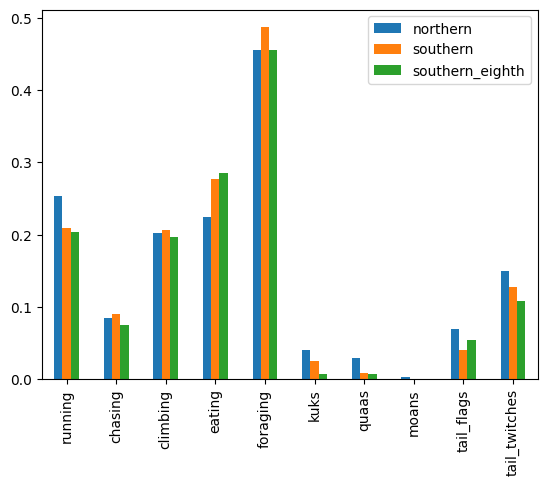

In [41]:
behaviors_location.plot(kind='bar')

In [42]:
#To create a heat map of eating behavior by hectare, start by grouping.
eat_heat = df.groupby(['hectare','hectare_horz','hectare_vert'])['eating'].sum().to_frame().reset_index().drop(columns='hectare')
eat_heat

,hectare_horz,hectare_vert,eating
0,A,1,0
1,B,1,3
2,C,1,0
3,D,1,0
4,E,1,0
...,...,...,...
301,E,42,0
302,F,42,0
303,G,42,0
304,H,42,1


In [43]:
#pivot to make a "horizontal" grid map
eat_heat_pivot=eat_heat.pivot('hectare_horz','hectare_vert', 'eating')
eat_heat_pivot

<ipython-input-43-280dd7d1f522>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  eat_heat_pivot=eat_heat.pivot('hectare_horz','hectare_vert', 'eating')


hectare_vert,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
hectare_horz,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
B,3.0,0.0,3.0,3.0,NaN,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,3.0,0.0,0.0,1.0,0.0,1.0,NaN,0.0,NaN,NaN,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
C,0.0,2.0,0.0,3.0,3.0,NaN,NaN,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0
D,0.0,2.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0,4.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,3.0,5.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
E,0.0,1.0,2.0,0.0,1.0,NaN,5.0,2.0,0.0,NaN,1.0,1.0,4.0,5.0,2.0,2.0,0.0,NaN,0.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,6.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0,1.0,0.0
F,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,5.0,1.0,0.0,3.0,1.0,3.0,2.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,0.0
G,1.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,3.0,NaN,0.0
H,1.0,0.0,0.0,0.0,NaN,2.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,2.0,NaN,NaN,1.0
I,NaN,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,5.0,0.0,0.0,NaN,0.0,0.0,1.0


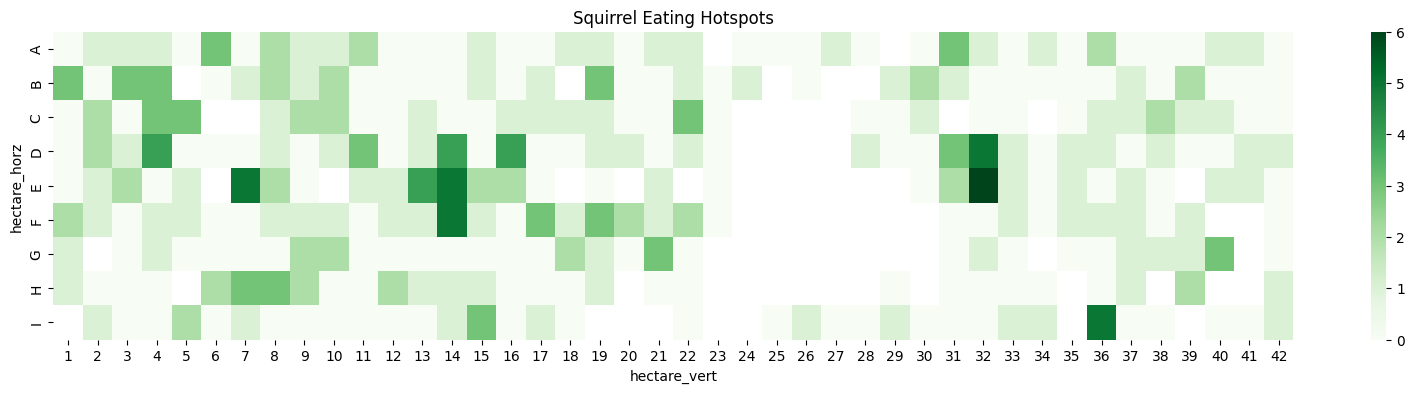

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(20,4)

sns.heatmap(ax=ax, data=eat_heat_pivot, cmap='Greens')
ax.set_title('Squirrel Eating Hotspots')

fig.show()

## Behavior Analysis based on the park being divided into 8 transverse sections

In [45]:
#Divide the park into 8 east/west sections and calculate the percentages of squirrels in each section that exhibit the behaviors (one squirrel can exhibit multiple behaviors).

#create an empty dataframe
behaviors_multi_location=pd.DataFrame(index=(behavior_cols))

for ind, lower in np.ndenumerate(np.arange(0,42,5.25)):
  upper = lower + 5.25

  #find the total number of squirrels in the current park section
  count = df.query('hectare_vert > @lower & hectare_vert <= @upper')['unique_squirrel_id'].count()

  #Create a new column for the current park section. The column is named by adding 1 to the current enumerated value (ind), so the column names represent sections 1 - 8 of the park.
  #The result of query.sum/count is a series with an index corresponding to the activities_multi_location dataframe. The series is added to the dataframe as the new column.
  behaviors_multi_location[ind[0]+1] = df.query('hectare_vert > @lower & hectare_vert <= @upper')[behavior_cols].sum()/count

behaviors_multi_location

,1,2,3,4,5,6,7,8
running,0.204082,0.203390,0.190184,0.220339,0.214286,0.313725,0.217687,0.312057
chasing,0.074830,0.124294,0.079755,0.067797,0.107143,0.019608,0.115646,0.070922
climbing,0.197279,0.169492,0.245399,0.228814,0.285714,0.196078,0.197279,0.170213
eating,0.285714,0.254237,0.263804,0.322034,0.178571,0.313725,0.217687,0.205674
foraging,0.455782,0.474576,0.496933,0.500000,0.321429,0.470588,0.530612,0.446809
kuks,0.006803,0.033898,0.018405,0.042373,0.071429,0.000000,0.047619,0.042553
quaas,0.006803,0.016949,0.006135,0.000000,0.017857,0.058824,0.020408,0.035461
moans,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007092
tail_flags,0.054422,0.045198,0.012270,0.084746,0.089286,0.098039,0.054422,0.049645
tail_twitches,0.108844,0.169492,0.085890,0.186441,0.142857,0.196078,0.170068,0.085106


<Axes: >

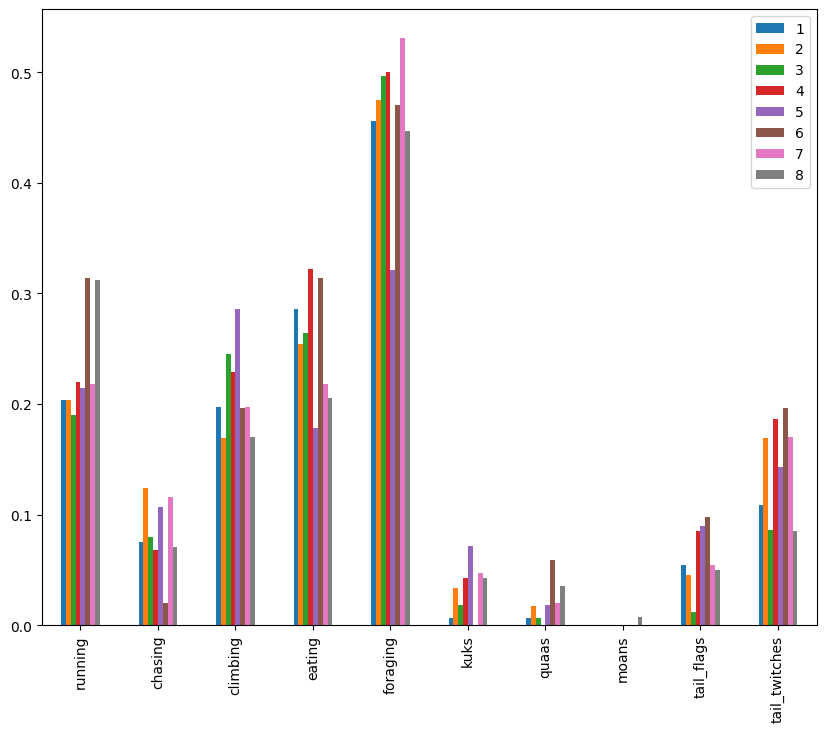

In [46]:
#A quick plot of percentage at each location grouped by behavior
behaviors_multi_location.plot(kind='bar', figsize=(10,8))

In [47]:
#The rest of the plots will require the data to show percentage seen of each behavior based on park location.
#This is accomplished by transposing the data so that the locations are the index.
#And for convenience, decimals are converted to percents.
behaviors_multi_location_t = (behaviors_multi_location*(100)).T
behaviors_multi_location_t

,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches
1,20.408163,7.482993,19.727891,28.571429,45.578231,0.680272,0.680272,0.00000,5.442177,10.884354
2,20.338983,12.429379,16.949153,25.423729,47.457627,3.389831,1.694915,0.00000,4.519774,16.949153
3,19.018405,7.975460,24.539877,26.380368,49.693252,1.840491,0.613497,0.00000,1.226994,8.588957
4,22.033898,6.779661,22.881356,32.203390,50.000000,4.237288,0.000000,0.00000,8.474576,18.644068
5,21.428571,10.714286,28.571429,17.857143,32.142857,7.142857,1.785714,0.00000,8.928571,14.285714
6,31.372549,1.960784,19.607843,31.372549,47.058824,0.000000,5.882353,0.00000,9.803922,19.607843
7,21.768707,11.564626,19.727891,21.768707,53.061224,4.761905,2.040816,0.00000,5.442177,17.006803
8,31.205674,7.092199,17.021277,20.567376,44.680851,4.255319,3.546099,0.70922,4.964539,8.510638


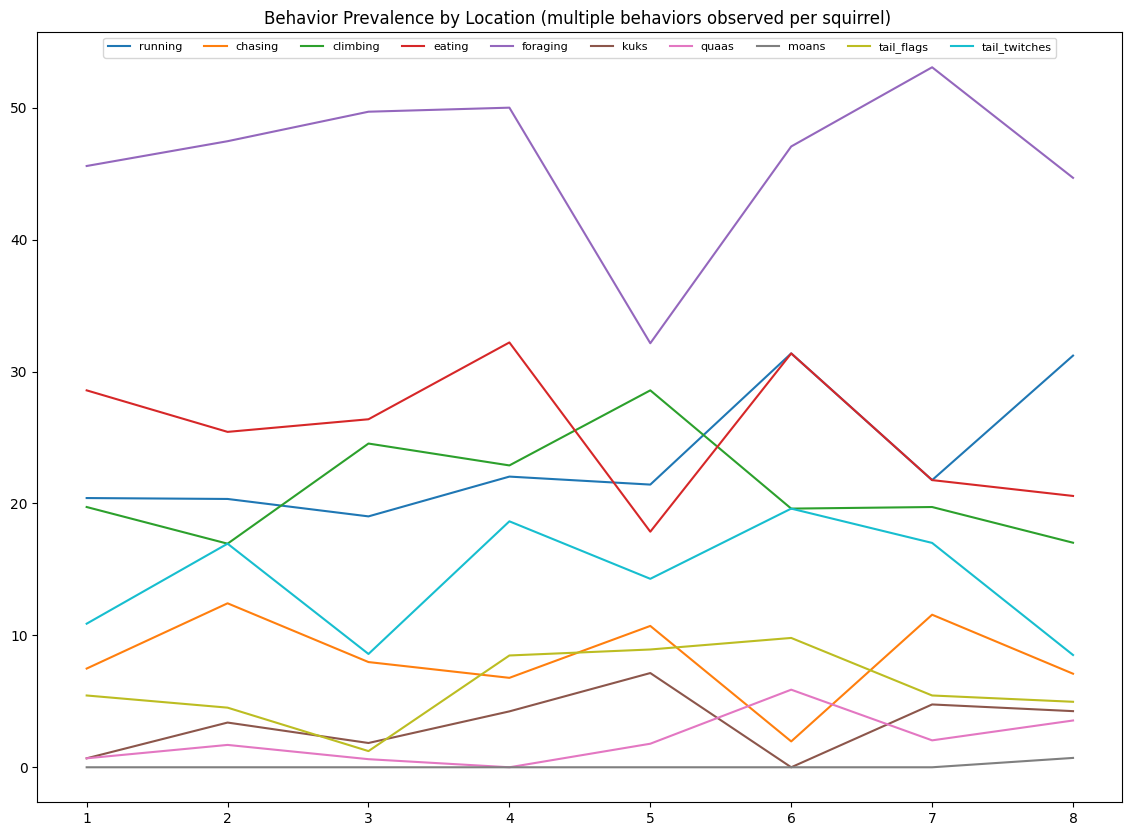

In [48]:
#Changes in behaviors across the eight sections can now be plotted
behaviors_multi_location_t.plot(figsize=(14,10), title='Behavior Prevalence by Location (multiple behaviors observed per squirrel) ')
plt.legend(ncols=10,prop={'size':8}, loc='upper center')
fig.show()

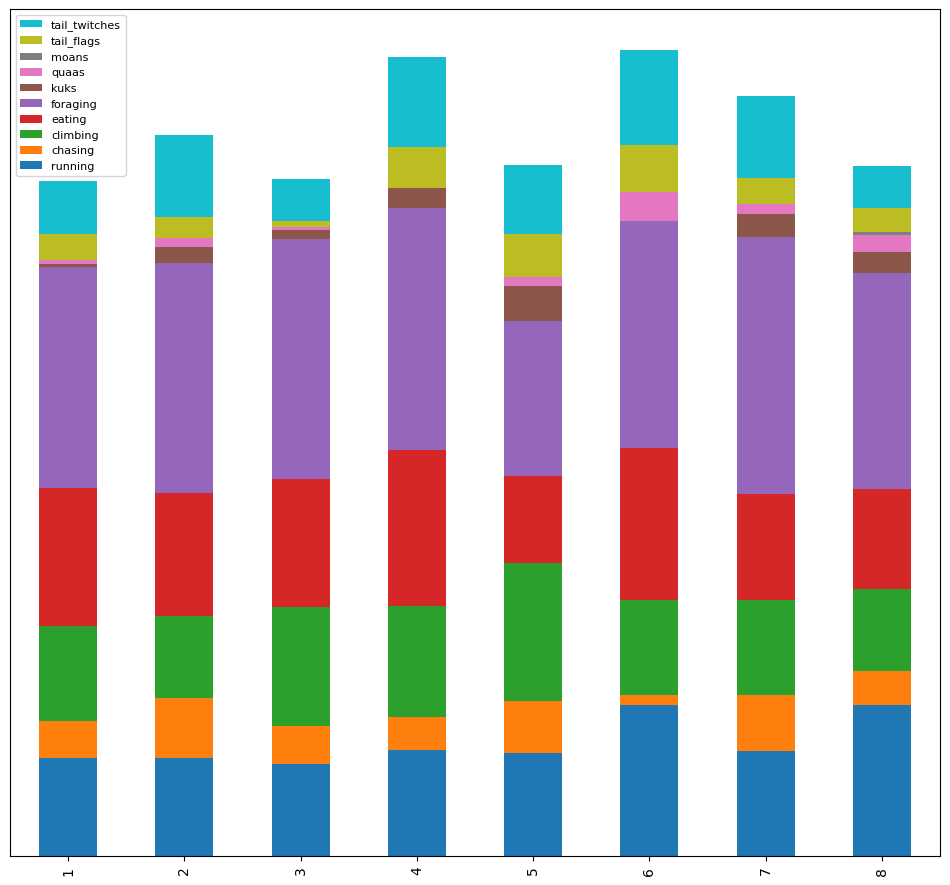

In [49]:
#This can also be visualized as stacked bars,
#but this may falsely imply that the behavior percentages can be added together
#at each location to get a location total
behaviors_multi_location_t.plot( kind='bar', stacked=True, figsize=(12,11), yticks=[])
plt.legend(ncol=1,loc='upper left', reverse=True, prop={'size':8})
fig.show()

In [50]:
behaviors_corr = behaviors_multi_location_t.corr()
behaviors_corr

,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches
running,1.000000,-0.664497,-0.414539,0.042056,-0.050604,-0.198938,0.869618,0.635402,0.421405,0.090483
chasing,-0.664497,1.000000,0.087163,-0.622818,-0.111219,0.643727,-0.529512,-0.139916,-0.385209,-0.084995
climbing,-0.414539,0.087163,1.000000,-0.205854,-0.543846,0.422443,-0.359677,-0.417344,0.204563,-0.051132
eating,0.042056,-0.622818,-0.205854,1.000000,0.532905,-0.730905,-0.029206,-0.387754,0.175788,0.392065
foraging,-0.050604,-0.111219,-0.543846,0.532905,1.000000,-0.465509,-0.092532,-0.098282,-0.394328,0.174069
kuks,-0.198938,0.643727,0.422443,-0.730905,-0.465509,1.000000,-0.272798,0.166390,0.162121,0.033424
quaas,0.869618,-0.529512,-0.359677,-0.029206,-0.092532,-0.272798,1.000000,0.322383,0.408986,0.247860
moans,0.635402,-0.139916,-0.417344,-0.387754,-0.098282,0.166390,0.322383,1.000000,-0.162611,-0.525476
tail_flags,0.421405,-0.385209,0.204563,0.175788,-0.394328,0.162121,0.408986,-0.162611,1.000000,0.688106
tail_twitches,0.090483,-0.084995,-0.051132,0.392065,0.174069,0.033424,0.247860,-0.525476,0.688106,1.000000


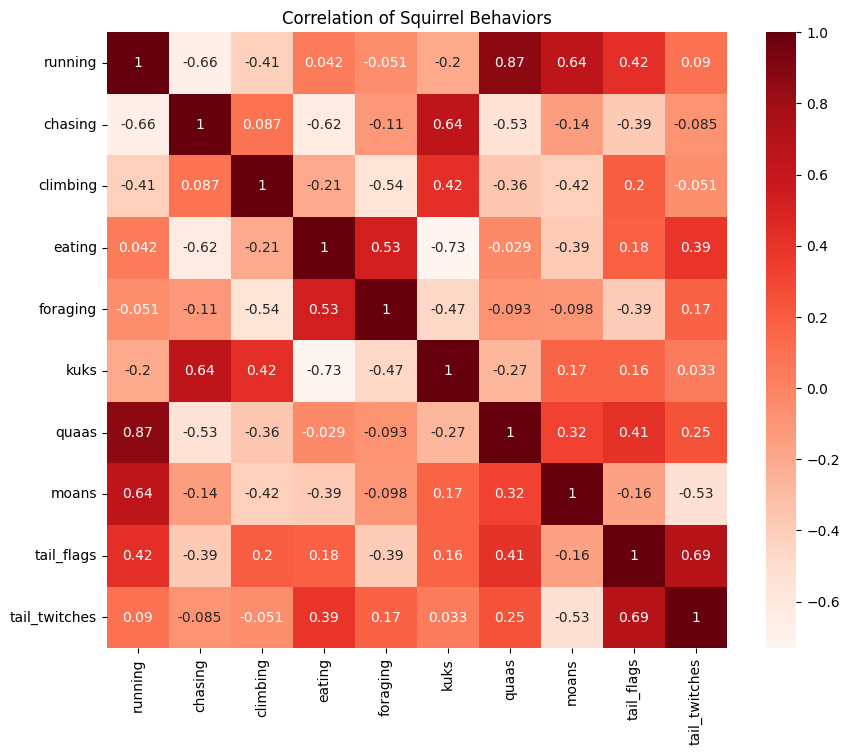

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.heatmap(ax=ax, data=behaviors_corr, cmap='Reds', annot=True)
ax.set_title('Correlation of Squirrel Behaviors')
fig.show()


In [52]:
#do subplots of line charts as per above showing only the 4 most and least correlated behaviors

#For the 4 least correlated:
#Find the minimum value in each behavior column of the correlation matrix.
#The values appears twice, once in each column of corresponding behaviors, e.g eating and kuks, -0.730905.
#Drop the duplicates and sort to create a "list" of behaviors that shows only one of corresponding behaviors from each pair, e.g. eating.
min_list = behaviors_corr.min().sort_values().drop_duplicates()
print(min_list)

#The eating column contains the top minimum value.
#Test getting the corresponding index, which is the correlated behavior, e.g kuks
print("\n"+behaviors_corr['eating'].idxmin()+"\n")

#Get the corresponding index for the first four entries on the min_list.
#Create a list of behavior pair tuples for the first four entries, e.g ('eating', 'kuks')
bottom4_corr=[(col, behaviors_corr[col].idxmin()) for col in min_list.index[:4]]
bottom4_corr

eating       -0.730905
running      -0.664497
climbing     -0.543846
quaas        -0.529512
moans        -0.525476
tail_flags   -0.394328
dtype: float64

kuks



[('eating', 'kuks'),
 ('running', 'chasing'),
 ('climbing', 'foraging'),
 ('quaas', 'chasing')]

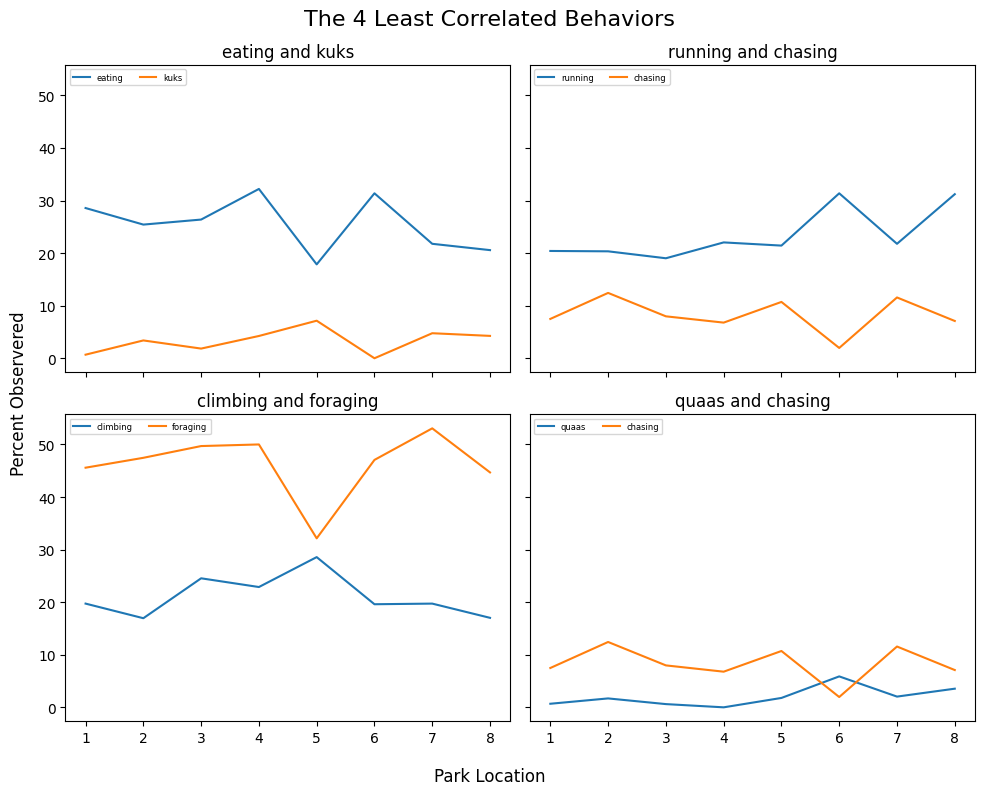

In [53]:
import math

fig, axes = plt.subplots(2,2, sharey=True, sharex=True)

fig.set_size_inches(10,8)

for i, behavs in enumerate(bottom4_corr):
  row=math.floor(i/1.75)
  col=(i%2)

  #get the behaviors from the tuple pair
  behav0 = behavs[0]
  behav1 = behavs[1]

  axes[row,col].plot(behaviors_multi_location_t[[behav0,behav1]], label=[behav0,behav1] )
  axes[row,col].set_title(behav0+' and '+behav1)
  axes[row,col].legend(loc="upper left", ncols=2,prop={'size':6})

fig.suptitle('The 4 Least Correlated Behaviors', fontsize=16)
fig.supxlabel('Park Location')
fig.supylabel('Percent Observered')
plt.tight_layout()


In [54]:
#To find the max values in the correlation matrix, we need to ignore the 1's.
#Set the 1's to 0
corrolated_for_max = behaviors_corr.replace(1,0)

max_list = corrolated_for_max.max().sort_values(ascending=False).drop_duplicates()
print(max_list)

top4_corr = [ (col, corrolated_for_max[col].idxmax()) for col in max_list.index[:4]]
top4_corr

running       0.869618
tail_flags    0.688106
chasing       0.643727
moans         0.635402
eating        0.532905
climbing      0.422443
dtype: float64


[('running', 'quaas'),
 ('tail_flags', 'tail_twitches'),
 ('chasing', 'kuks'),
 ('moans', 'running')]

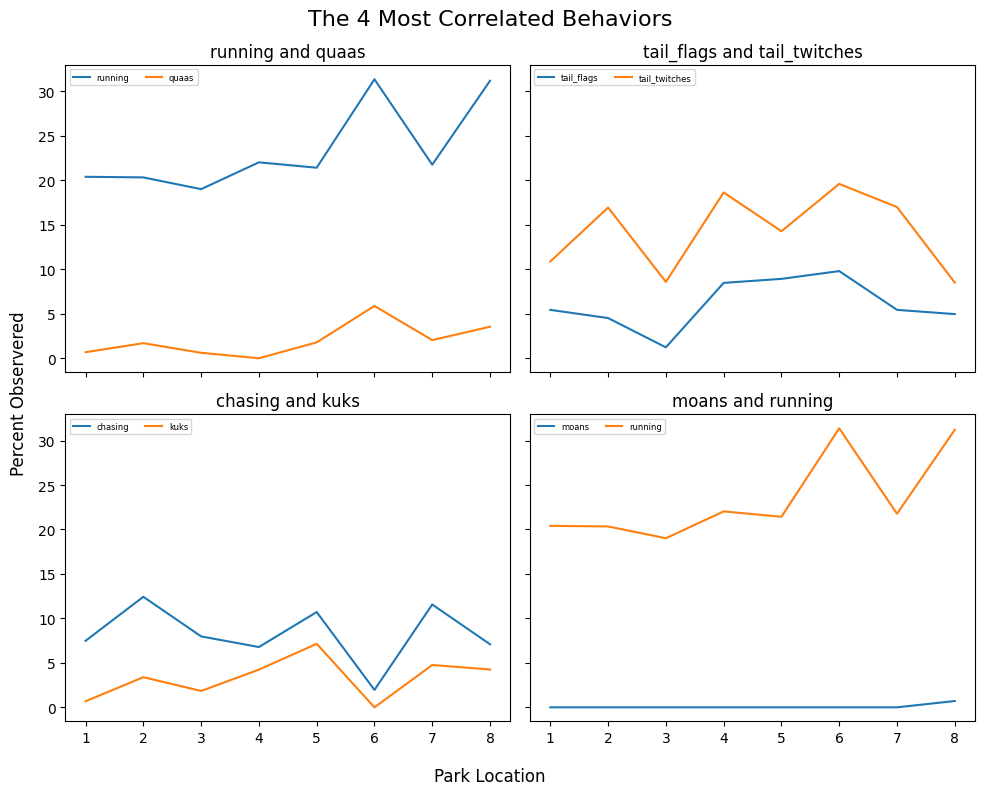

In [55]:
fig, axes = plt.subplots(2,2, sharey=True, sharex=True)

fig.set_size_inches(10,8)

for i,behavs in enumerate(top4_corr):
  row=math.floor(i/1.75)
  col=(i%2)

  #get the behaviors from the tuple pair
  behav0 = behavs[0]
  behav1 = behavs[1]

  axes[row,col].plot(behaviors_multi_location_t[[behav0,behav1]], label=[behav0,behav1] )
  axes[row,col].set_title(behav0+' and '+behav1)
  axes[row,col].legend(loc="upper left", ncols=2,prop={'size':6})

fig.suptitle('The 4 Most Correlated Behaviors', fontsize=16)
fig.supxlabel('Park Location')
fig.supylabel('Percent Observered')
plt.tight_layout()

    • User Guide | Central Park Squirrel Census Data Collection

https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw

Created: October 10, 2019
Last Updated: October 14, 2019
The Squirrel Census

What’s In This Data Collection?

The Squirrel Census is a multimedia science, design, and storytelling project focusing on the Eastern gray (Sciurus carolinensis). They count squirrels and present their findings to the public. In October 2018 — with the help of 323 volunteer Squirrel Sighters, as well as The Explorers Club, NYU Department of Environmental Studies, Macaulay Honors College, the Central Park Conservancy, and New York City Department of Parks & Recreation — they tallied the squirrels in Central Park in New York, NY, and gathered other material data. The Central Park Squirrel Census (CPSC) resulted in the June 2019 release of the multimedia report The Central Park Squirrel Census 2019 Report. This is the raw data from the Census observation period. The data was digitally tabulated from over 3,000 pages of tally sheets used during the Census by the Squirrel Sighters. It encompasses 700 total squirrel-counting sessions over 350 “countable” park hectares. The data is organized into three sets:

CPSC Hectare Data: This table contains environmental data related to each of the 350 “countable” hectares of Central Park. Examples include weather, litter, animals sighted, and human density.

CPSC Squirrel Data: This table contains squirrel data for each of the 3,023 sightings, including location coordinates, age, primary and secondary fur color, elevation, activities, communications, and interactions between squirrels and with humans.

CPSC Stories: This table contains stories, observations, and notes written on tally sheets by Squirrel Sighters during the Census. Individual stories have been tagged with common story themes, such as “squirrel experience,” “park experience,” “dogs,” “other animals,” “accidental poems,” and “squirrels acting odd.”

Who Manages This Data Collection?

The Squirrel Census, based in Atlanta, GA, manages this data. The Central Park Squirrel Census is one of three major counts of squirrels performed by the team. The other two occurred in Inman Park, an historic Atlanta neighborhood. The Squirrel Census uses a wildlife counting methodology and formula originally created by biologist Vagn Flyger. The data collected was used by the Squirrel Census to create the Central Park Squirrel Census 2019 Report, which includes:

    • a five-foot-long map of Central Park that is one of the most comprehensive surveys of the green space ever created (the first major update since 1994) and includes observations on human activity in the park and at least two newly named locations
    • a five-foot-long “celestial” chart showing squirrel locations, population densities, fur coloration patterns, and other data
    • a “Squirrel Supplemental” with 37 pages of additional squirrel data, insights, and stories
    • the “Central Park Squirrel Census Audio Report,” a 45-RPM experiential soundtrack of the park using notes gathered during the Census and read by Squirrel Sighters and the Squirrel Census team
    • postcards, a “baseball card,” and other fun

The Report is available for purchase on the Census website (thesquirrelcensus.com).

The Central Park Squirrel Census was completed for many reasons: to learn more about the populations and behaviors of the Eastern gray (which is so common that it’s often overlooked in academic studies); to tell a data-driven narrative about Central Park and urban green spaces in general; to engage in citizen science and community building; and to transform the space of Central Park into an art project and story that unfolded in real time.

Get Started With This Data:

    • What human activities were happening in different parts of the park during the Census?
    • How does squirrel fur color change throughout the park?
    • What stories did Squirrel Sighters record about their time counting squirrels?

Columns (Fields, Attributes):

# Hectare Data
_file name hectare-data.csv_
### Hectare
ID tag, which is derived from the hectare grid used to divide and count the park area. One axis that runs predominantly north-to-south is numerical (1-42), and the axis that runs predominantly east-to-west is alphabetical (A-I).
### Shift
Value is either "AM" or "PM," to communicate whether the sighting session occurred in the morning or late afternoon.
### Date
Concatenation of the sighting session month, day, and year (MMDDYYYY).
### Anonymized Sighter
Sighter names were alphabetized then assigned a number (1-267) so that the individual abilities and characteristics of each sighter could be taken into account.
### Sighter Observed Weather Data
Each sighter was asked to describe the weather conditions before starting each sighting session. Weather values varied widely, and are in some cases inaccurate.
### Litter
Value can be "None", "Some" or "Abundant."
### Litter Notes
Sighters occasionally added commentary on the amount or quality of litter. These notes are provided here.
### Other Animal Sightings
Comma separated values indicating other animals sighted in the hectare. A list of other animals common to the park were provided; however, other animals were listed as well.
### Hectare Conditions
Value is one of the following: “Calm”, “Moderate”, “Calm, busy” or “Busy.” The difference between “moderate” and “calm, busy” is as follows: “moderate” was either entered by the sighter, or translated from an entry that described a condition somewhere in-between busy and calm. “Calm, busy” was either entered by the sighter or translated from an entry that described discrete hectare sections as busy, but other hectare areas as separately calm.
### Hectare Conditions Notes
Sighters occasionally added commentary on the hectare conditions. These notes are provided here.
### Number of Sighters
The number of sighters that observed the hectare for the sighting session. Values range from "1" to "3."
### Number of Squirrels
The number of squirrels sighted in the hectare during the sighting session.
### Total Time of Sighting
The sighting session duration, in minutes.

#Squirrel Data
_file name squirrel-data.csv_
### X
Longitude coordinate for squirrel sighting point
### Y
Latitude coordinate for squirrel sighting point
### Unique Squirrel ID
Identification tag for each squirrel sightings. The tag is comprised of "Hectare ID" + "Shift" + "Date" (MMDD) + "Hectare Squirrel Number."
### Hectare
ID tag, which is derived from the hectare grid used to divide and count the park area. One axis that runs predominantly north-to-south is numerical (1-42), and the axis that runs predominantly east-to-west is alphabetical (A-I).

### Shift
Value is either "AM" or "PM," to communicate whether the sighting session occurred in the morning or late afternoon.
### Date
Concatenation of the sighting session month, day, and year (MMDDYYYY).
### Hectare Squirrel Number
Number within the chronological sequence of squirrel sightings for a discrete sighting session.
### Age
Value is either "Adult" or "Juvenile."
### Primary Fur Color
Value is either "Gray," "Cinnamon," or "Black."
### Highlight Fur Color
Discrete value or string values comprised of "Gray," "Cinnamon," “Black,” or "White."
### Combination of Primary and Highlight Color
A combination of the previous two columns; this column gives the total permutations of primary and highlight colors observed.
### Color Notes
Sighters occasionally added commentary on the squirrel fur conditions. These notes are provided here.
### Location
Value is either "Ground Plane" or "Above Ground." Sighters were instructed to indicate the location of where the squirrel was when first sighted.
### Above Ground Sighter Measurement
For squirrel sightings on the ground plane, fields were populated with a value of “FALSE.”
### Specific Location
Sighters occasionally added commentary on the squirrel location. These notes are provided here.
### Running
Squirrel was seen running.
### Chasing
Squirrel was seen chasing another squirrel.
### Climbing
Squirrel was seen climbing a tree or other environmental landmark.
### Eating
Squirrel was seen eating.
### Foraging
Squirrel was seen foraging for food.
### OtherActivities
### Kuks
Squirrel was heard kukking, a chirpy vocal communication used for a variety of reasons.
### Quaas
Squirrel was heard quaaing, an elongated vocal communication which can indicate the presence of a ground predator such as a dog.
### Moans
Squirrel was heard moaning, a high-pitched vocal communication which can indicate the presence of an air predator such as a hawk.
### Tail Flags
Squirrel was seen flagging its tail. Flagging is a whipping motion used to exaggerate squirrel's size and confuse rivals or predators. Looks as if the squirrel is scribbling with tail into the air.
### Tail Twitches
Squirrel was seen twitching its tail. Looks like a wave running through the tail, like a breakdancer doing the arm wave. Often used to communicate interest, curiosity.
### Approaches
Squirrel was seen approaching human, seeking food.
### Indifferent
Squirrel was indifferent to human presence.
### Runs From
Squirrel was seen running from humans, seeing them as a threat.
### Other Interactions
Sighter notes on other types of interactions between squirrels and humans.

#Squirrel Stories
_file name squirrel-stories.csv_
### Hectare
ID tag, which is derived from the hectare grid used to divide and count the park area. One axis that runs predominantly north-to-south is numerical (1-42), and the axis that runs predominantly east-to-west is alphabetical (A-I).
### Shift
Value is either "AM" or "PM," to communicate whether the sighting session occurred in the morning or late afternoon.
### Date
Concatenation of the sighting session month, day, and year (MMDDYYYY).
### Note Squirrel & Park Stories
Copy notated by sighter while observing hectare
### Story Topic: Squirrel Experience or Squirrel Story
This tag indicates sighter wrote down story that dealt primarily with squirrels and their experience of the park.
### Story Topic: Park Experience or Census Taker Story
This tag indicates sighter (or “Census taker”) wrote down story about other park goer(s) or their own experience in the park.
### Story Topic: Dogs
This tag indicates sighter noted story about dogs they observed.
### Story Topic: Other Animals
This tag indicates sighter noted observations about other animals in the park.
### Story Topic: Accidental Poems
This tag indicates a note from sighter that read, to the Census team, like short poems about the park.
### Story Topic: Squirrel Acting Odd
This tag indicates a note from sighter about squirrels that read, to the Census team, as odd or unusual squirrel behavior.
### Story Topic: Census Takers Recognized
This tag indicates a sighter (or “Census taker”) recorded a story about being recognized as part of the Central Park Squirrel Census by other park goer(s).
### Story Topic: Other
Random, uncategorized stories were filed here.

--
